In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import Data

In [3]:
data = pd.read_csv('train.csv')
data = data.drop('Id', axis = 1)
data_copy = data.copy(deep = True)

In [4]:
data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

# EDA

## Data Information

In [5]:
data.shape

(15120, 55)

In [6]:
data.info()
#There is no missing data, great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [7]:
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [8]:
data.corr()['Cover_Type'].sort_values()

Wilderness_Area1                     -0.230117
Soil_Type29                          -0.218564
Soil_Type22                          -0.195993
Soil_Type23                          -0.158762
Soil_Type32                          -0.132312
Soil_Type12                          -0.129985
Horizontal_Distance_To_Roadways      -0.105662
Soil_Type24                          -0.100797
Hillshade_Noon                       -0.098905
Horizontal_Distance_To_Fire_Points   -0.089389
Soil_Type31                          -0.079882
Soil_Type33                          -0.078955
Hillshade_3pm                        -0.053399
Soil_Type20                          -0.053013
Soil_Type19                          -0.031824
Soil_Type4                           -0.027816
Soil_Type9                           -0.027012
Soil_Type21                          -0.024410
Soil_Type27                          -0.023109
Soil_Type26                          -0.017184
Soil_Type3                           -0.016393
Soil_Type28  

<AxesSubplot:>

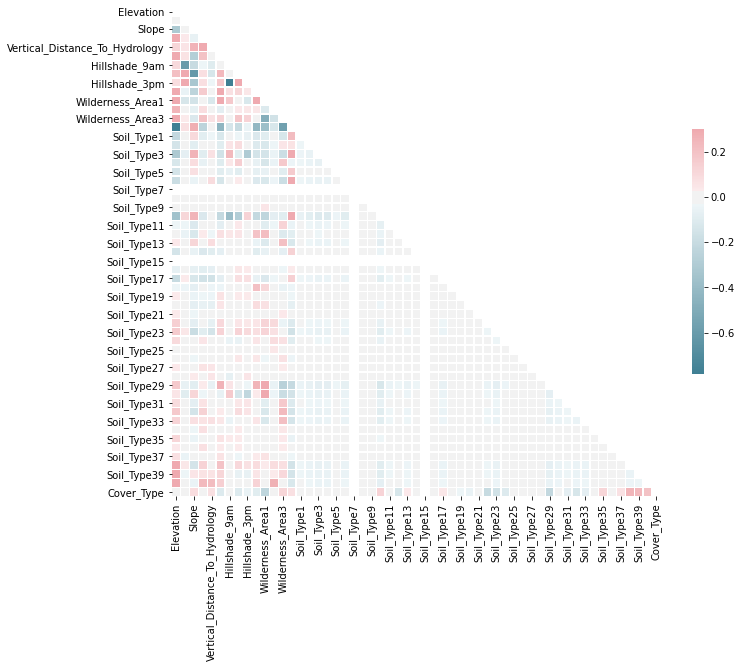

In [9]:
#Plot the heatmap of all features 
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

(10.0, 0.0)

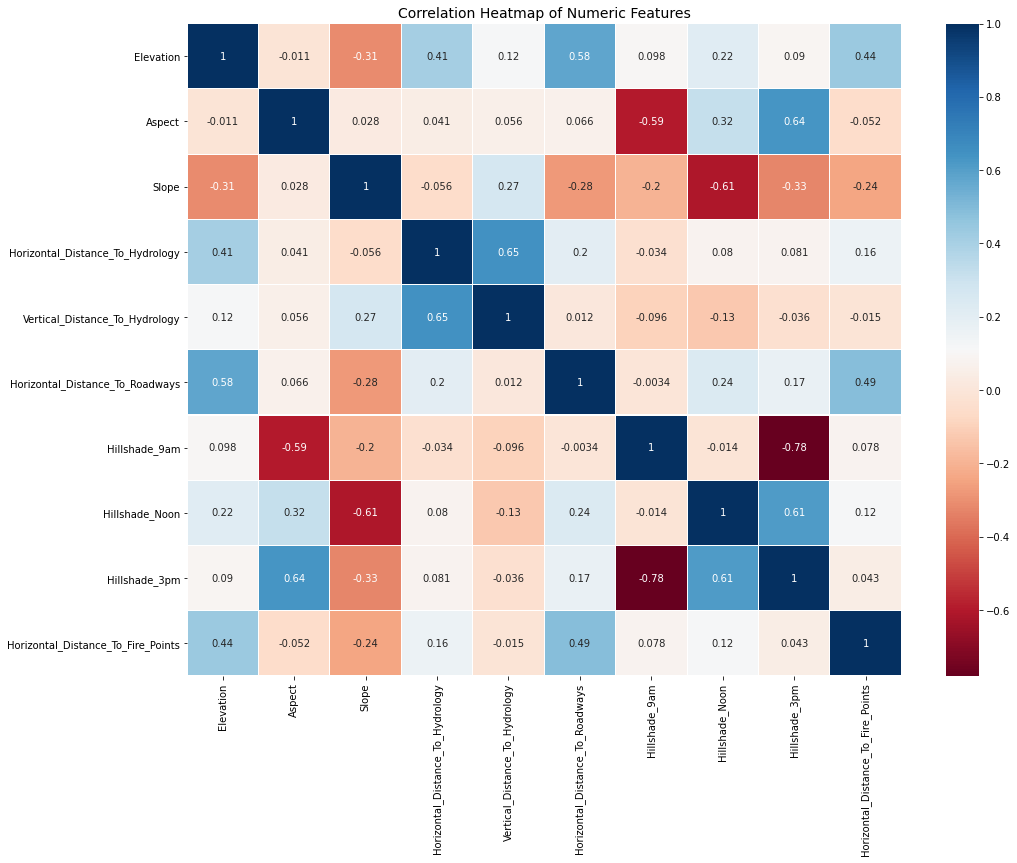

In [10]:
#Plot the heatmap of numeric features
data_numeric = data.iloc[:,0:10]
corr = data_numeric.corr()

# plot the heatmap
plt.figure(figsize=(16,12))
colormap = plt.cm.RdBu
sns.heatmap(corr,linewidths=0.08, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Correlation Heatmap of Numeric Features', size=14)
plt.ylim(10,0)

## Visualization

### Elevation

In [11]:
data['Elevation'].describe()

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64

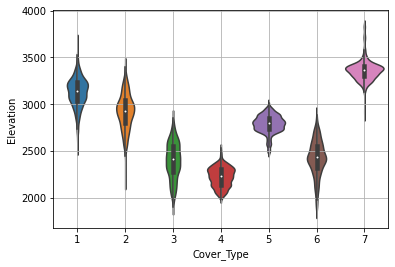

In [12]:
sns.violinplot(x = data['Cover_Type'], y = data['Elevation'])
plt.grid()

### Aspect

In [13]:
data['Aspect'].describe()

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64

<AxesSubplot:xlabel='Aspect'>

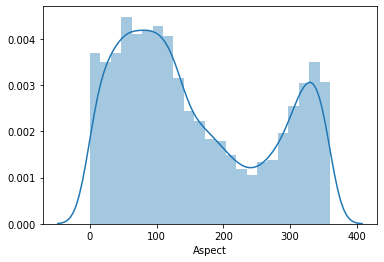

In [14]:
sns.distplot(data['Aspect'])

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

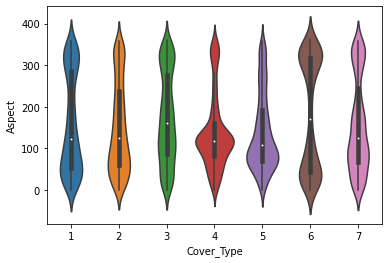

In [15]:
sns.violinplot(x = data['Cover_Type'], y = data['Aspect'])

### Slope

In [16]:
data['Slope'].describe()

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64

<AxesSubplot:xlabel='Slope'>

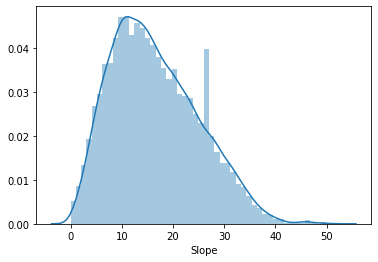

In [17]:
sns.distplot(data['Slope'])

### Horizontal/Vertical Distance to Hydrology

In [18]:
data.Horizontal_Distance_To_Hydrology.describe()

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

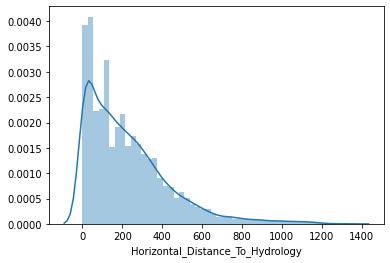

In [19]:
sns.distplot(data.Horizontal_Distance_To_Hydrology)

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology'>

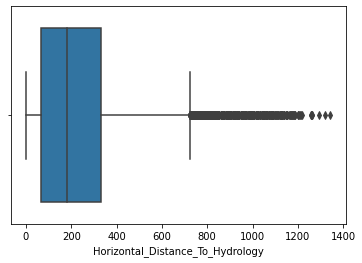

In [20]:
sns.boxplot(data.Horizontal_Distance_To_Hydrology)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

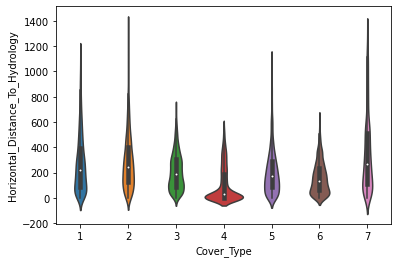

In [21]:
sns.violinplot(x = data['Cover_Type'], y = data.Horizontal_Distance_To_Hydrology)

In [22]:
data.Vertical_Distance_To_Hydrology.describe()

count    15120.000000
mean        51.076521
std         61.239406
min       -146.000000
25%          5.000000
50%         32.000000
75%         79.000000
max        554.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

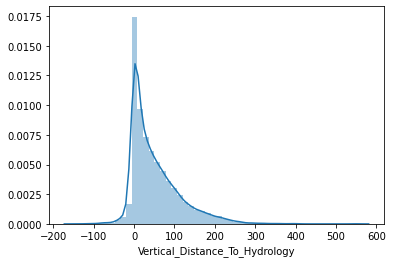

In [23]:
sns.distplot(data.Vertical_Distance_To_Hydrology)

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

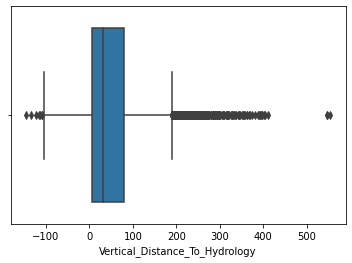

In [24]:
sns.boxplot(data.Vertical_Distance_To_Hydrology)
#There is outlier

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

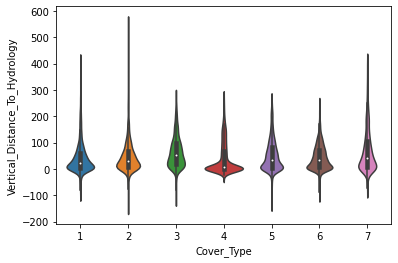

In [25]:
sns.violinplot(x = data['Cover_Type'], y = data.Vertical_Distance_To_Hydrology)

In [26]:
data['Distance_To_Hydrology'] = np.sqrt(data.Horizontal_Distance_To_Hydrology ** 2 + 
                                       data.Vertical_Distance_To_Hydrology ** 2)

<AxesSubplot:xlabel='Distance_To_Hydrology'>

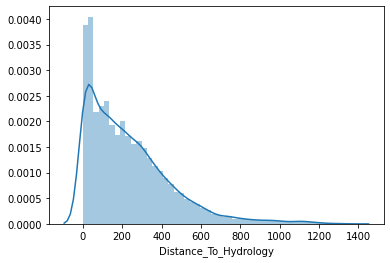

In [27]:
sns.distplot(data['Distance_To_Hydrology'])

<AxesSubplot:xlabel='Cover_Type', ylabel='Distance_To_Hydrology'>

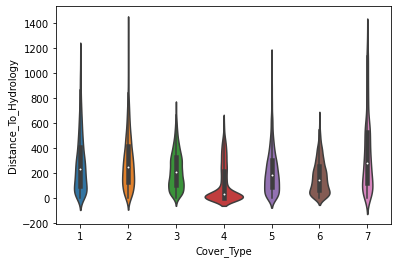

In [28]:
sns.violinplot(x = data['Cover_Type'], y = data.Distance_To_Hydrology)

### Hillshade_9am

In [29]:
data['Hillshade_9am'].describe()

count    15120.000000
mean       212.704299
std         30.561287
min          0.000000
25%        196.000000
50%        220.000000
75%        235.000000
max        254.000000
Name: Hillshade_9am, dtype: float64

<AxesSubplot:xlabel='Hillshade_9am'>

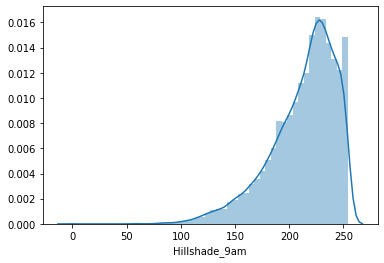

In [30]:
sns.distplot(data['Hillshade_9am'])

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

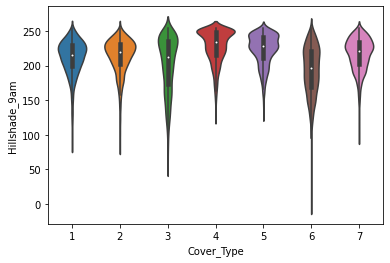

In [31]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_9am'])

<AxesSubplot:xlabel='Hillshade_9am'>

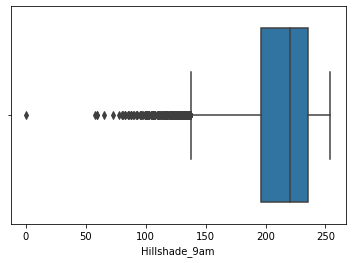

In [32]:
sns.boxplot(data.Hillshade_9am)
#Outlier

#### Hillshade_Noon

In [33]:
data.Hillshade_Noon.describe()

count    15120.000000
mean       218.965608
std         22.801966
min         99.000000
25%        207.000000
50%        223.000000
75%        235.000000
max        254.000000
Name: Hillshade_Noon, dtype: float64

<AxesSubplot:xlabel='Hillshade_Noon'>

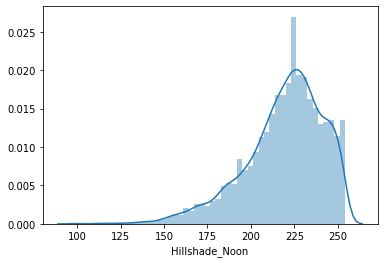

In [34]:
sns.distplot(data.Hillshade_Noon)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

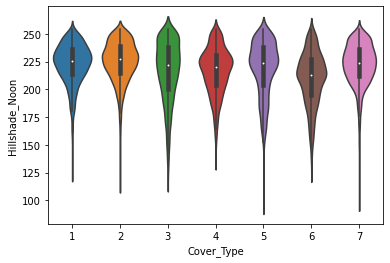

In [35]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_Noon'])

<AxesSubplot:xlabel='Hillshade_Noon'>

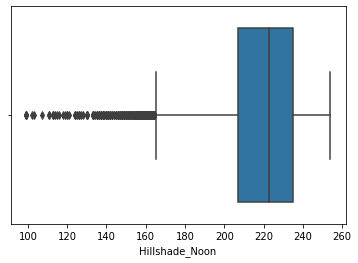

In [36]:
sns.boxplot(data.Hillshade_Noon)

### Hillshade_3pm

In [37]:
data.Hillshade_3pm.describe()

count    15120.000000
mean       135.091997
std         45.895189
min          0.000000
25%        106.000000
50%        138.000000
75%        167.000000
max        248.000000
Name: Hillshade_3pm, dtype: float64

<AxesSubplot:xlabel='Hillshade_3pm'>

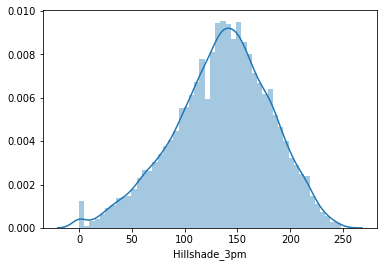

In [38]:
sns.distplot(data.Hillshade_3pm)
#print(data.Hillshade_3pm.skew())

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

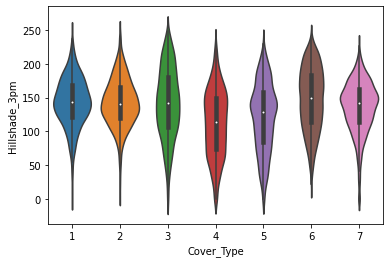

In [39]:
sns.violinplot(x = data['Cover_Type'], y = data['Hillshade_3pm'])

<AxesSubplot:xlabel='Hillshade_3pm'>

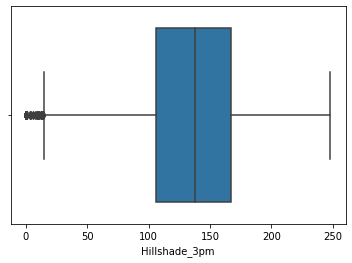

In [40]:
sns.boxplot(data.Hillshade_3pm)

### Horizontal_Distance_To_Fire_Points

In [41]:
data.Horizontal_Distance_To_Fire_Points.describe()

count    15120.000000
mean      1511.147288
std       1099.936493
min          0.000000
25%        730.000000
50%       1256.000000
75%       1988.250000
max       6993.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

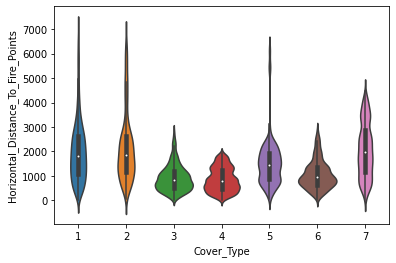

In [42]:
sns.violinplot(x = data['Cover_Type'], y = data.Horizontal_Distance_To_Fire_Points)

<AxesSubplot:xlabel='Horizontal_Distance_To_Fire_Points'>

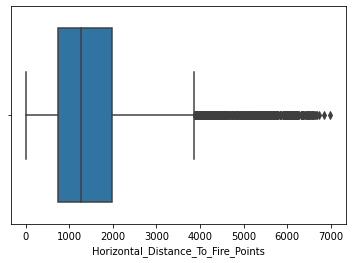

In [43]:
sns.boxplot(data.Horizontal_Distance_To_Fire_Points)

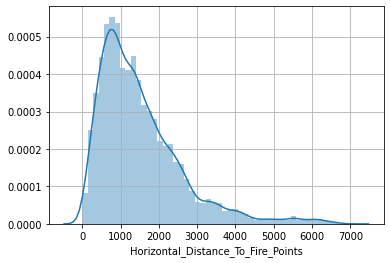

In [44]:
sns.distplot(data.Horizontal_Distance_To_Fire_Points)
plt.grid()

### Wilderness_Area

In [45]:
#Combing all wilderness_area columns into one column


In [46]:
def extract_wilderness(row):
    for i in range(1, 5):
        column_name = 'Wilderness_Area'+str(i)
        if row[column_name] == 1:
            return column_name

In [47]:
data['Wilderness_Area'] = data.apply(extract_wilderness, axis = 1)


In [48]:
data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Cover_Type  Distance_To_Hydrology   Wilderness_Area  
0           5             258.000000  Wilderness_Area1  
1           5             212.084889  Wilderness_Area1  
2           2             275.769832  Wilderness_Area1  
3           2             269.235956  Wilderness_Area1  
4           5             153.003268  Wilderness_Area1  

[5 rows x 57 columns]

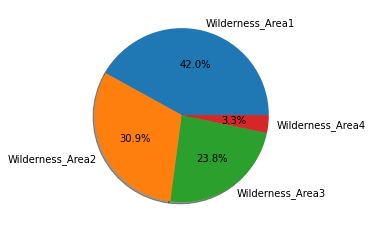

In [49]:
fig = plt.pie(data['Wilderness_Area'].value_counts(), 
        labels = ['Wilderness_Area1', 'Wilderness_Area2','Wilderness_Area3', 'Wilderness_Area4'], 
        autopct='%1.1f%%', shadow = True)


In [50]:
fig = px.histogram(data.sort_values(['Cover_Type', 'Wilderness_Area']),
                       x = "Wilderness_Area", color = "Cover_Type", barmode = "group",
                       height = 400, width = 800)
fig.show()
# We can see that some wilderness areas only have certain forest cover types.
# None of the wilderness areas have ALL forest cover types.

### Soil_Type

In [51]:
#Combing all soil_type columns into one column

In [52]:
def extract_soil(row):
    for i in range(1, 41):
        column_name = 'Soil_Type'+str(i)
        if row[column_name] == 1:
            return column_name

In [53]:
data['Soil_Type'] = data.apply(extract_soil, axis = 1)

In [54]:
data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type35  Soil_Type36  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  \
0            0            0            0            0           5   
1            0            0            0            0           5   
2            0            0            0            0           2   
3            0            0            0            0           2   
4            0            0            0            0           5   

   Distance_To_Hydrology   Wilderness_Area    Soil_Type  
0             258.000000  Wilderness_Area1  Soil_Type29  
1             212.084889  Wilderness_Area1  Soil_Type29  
2             275.769832  Wilderness_Area1  Soil_Type12  
3             269.235956  Wilderness_Area1  Soil_Type30  
4             153.003268  Wilderness_Area1  Soil_Type29  

[5 rows x 58 columns]

In [55]:
fig = px.histogram(data.sort_values(['Cover_Type', 'Soil_Type']), 
                   x = 'Soil_Type', color = 'Cover_Type', height = 400, width = 850)
fig.show()

In [56]:
soil_type_percent = pd.DataFrame((data['Soil_Type'].value_counts())/(data['Soil_Type'].value_counts().sum()))
soil_type_percent.columns = ['Percent']
soil_type_percent.sort_values('Percent', ascending = False)
# We have a lot of Soil Type 10 and 29

Percent
Soil_Type10  0.141667
Soil_Type29  0.085384
Soil_Type3   0.063624
Soil_Type4   0.055754
Soil_Type23  0.050066
Soil_Type38  0.048148
Soil_Type30  0.047950
Soil_Type32  0.045635
Soil_Type39  0.043452
Soil_Type6   0.042989
Soil_Type2   0.041204
Soil_Type33  0.040741
Soil_Type17  0.040476
Soil_Type13  0.031481
Soil_Type40  0.030357
Soil_Type11  0.026852
Soil_Type1   0.023479
Soil_Type22  0.022817
Soil_Type31  0.021958
Soil_Type24  0.016997
Soil_Type12  0.015013
Soil_Type14  0.011177
Soil_Type5   0.010913
Soil_Type20  0.009193
Soil_Type16  0.007540
Soil_Type35  0.006746
Soil_Type18  0.003968
Soil_Type26  0.003571
Soil_Type19  0.003042
Soil_Type37  0.002249
Soil_Type34  0.001455
Soil_Type21  0.001058
Soil_Type27  0.000992
Soil_Type9   0.000661
Soil_Type36  0.000661
Soil_Type28  0.000595
Soil_Type25  0.000066
Soil_Type8   0.000066

In [57]:
fig = px.histogram(data.sort_values(['Wilderness_Area']), 
                   x = 'Soil_Type', color = 'Wilderness_Area', height = 400, width = 850)
fig.show()

### Cover_Type

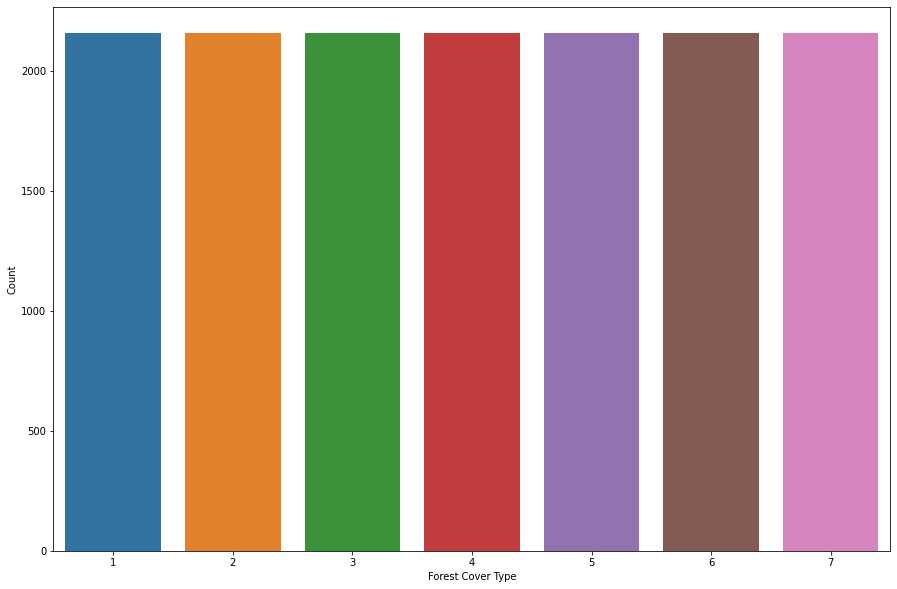

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(data['Cover_Type'])
plt.xlabel("Forest Cover Type")
plt.ylabel("Count")
plt.show()

# Baseline Model

In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_copy, test_size = 0.2, random_state = 0)
X = data_copy.drop(['Cover_Type'], axis = 1)
y = data_copy['Cover_Type']

In [60]:
X_train = train.drop('Cover_Type', axis = 1)
y_train = train['Cover_Type']

X_test = test.drop('Cover_Type', axis = 1)
y_test = test['Cover_Type']

In [61]:
X_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7366        3367     294      9                               295   
4936        2221     110     26                                90   
5777        3372     265      6                                30   
10724       2555     121     10                                 0   
9412        3428       3     19                               636   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7366                               29                             1471   
4936                               24                              764   
5777                                4                             4288   
10724                               0                              722   
9412                               80                             4160   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
7366             196             238            182   
4936             253             202             60   
5777             205             243            176   
10724            237             232            125   
9412             191             200            143   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type31  Soil_Type32  \
7366                                  860  ...            0            0   
4936                                 1527  ...            0            0   
5777                                 4195  ...            0            0   
10724                                1142  ...            0            0   
9412                                 3546  ...            0            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
7366             0            0            0            0            0   
4936             0            0            0            0            0   
5777             0            0            0            0            0   
10724            0            0            0            0            0   
9412             0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  
7366             1            0            0  
4936             0            0            0  
5777             0            0            1  
10724            0            0            0  
9412             0            1            0  

[5 rows x 54 columns]

## Prepare data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
def prepare_data_baseline(df):
    #Standardize all numerical columns
    sd = StandardScaler()
    df.iloc[:, 0:10] = sd.fit_transform(df.iloc[:, 0:10])
    return df

In [64]:
X_train_baseline = prepare_data_baseline(X_train)
X_test_baseline = prepare_data_baseline(X_test)

In [65]:
X_train_baseline.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
7366    1.477452  1.246418 -0.886308                          0.313958   
4936   -1.271547 -0.424954  1.127206                         -0.655707   
5777    1.489446  0.982995 -1.241633                         -0.939512   
10724  -0.470355 -0.325035 -0.767866                         -1.081414   
9412    1.623778 -1.396892  0.298112                          1.926913   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7366                        -0.362708                        -0.179131   
4936                        -0.444100                        -0.715014   
5777                        -0.769668                         1.956064   
10724                       -0.834782                        -0.746849   
9412                         0.467490                         1.859044   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
7366       -0.554821        0.834787       1.027495   
4936        1.320721       -0.745848      -1.637121   
5777       -0.258683        1.054319       0.896448   
10724       0.794253        0.571347      -0.217449   
9412       -0.719342       -0.833661       0.175691   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type31  Soil_Type32  \
7366                            -0.590132  ...            0            0   
4936                             0.016264  ...            0            0   
5777                             2.441847  ...            0            0   
10724                           -0.333755  ...            0            0   
9412                             1.851816  ...            0            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
7366             0            0            0            0            0   
4936             0            0            0            0            0   
5777             0            0            0            0            0   
10724            0            0            0            0            0   
9412             0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  
7366             1            0            0  
4936             0            0            0  
5777             0            0            1  
10724            0            0            0  
9412             0            1            0  

[5 rows x 54 columns]

In [68]:
#Use XGBClassifier for baseline model
from xgboost import XGBClassifier
xgb= XGBClassifier()

In [69]:
xgb.fit(X_train_baseline, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print('The accuracy score is:', accuracy_score(xgb.predict(X_test_baseline), y_test))
# 0.838

The accuracy score is: 0.8389550264550265


# Trying to improve model!

In [72]:
data_copy_ = data_copy.copy(deep = True)

In [73]:
# Remove outlier
first_quartile = np.percentile(np.array(data_copy_['Horizontal_Distance_To_Fire_Points'].tolist()), 25)
third_quartile = np.percentile(np.array(data_copy_['Horizontal_Distance_To_Fire_Points'].tolist()), 75)
IQR = third_quartile - first_quartile
upper_limit = third_quartile+(3*IQR)
lower_limit = first_quartile-(3*IQR)

data_copy_ = data_copy_[(data_copy_['Horizontal_Distance_To_Fire_Points'] <= upper_limit) & 
                            (data_copy_['Horizontal_Distance_To_Fire_Points'] >= lower_limit)]

In [74]:
print(data_copy.shape)
print(data_copy_.shape)

(15120, 55)
(14988, 55)


In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_copy_, test_size = 0.2, random_state = 0)
X = data_copy_.drop(['Cover_Type'], axis = 1)
y = data_copy_['Cover_Type']

X_train = train.drop('Cover_Type', axis = 1)
y_train = train['Cover_Type']

X_test = test.drop('Cover_Type', axis = 1)
y_test = test['Cover_Type']

## Feature Engineering

In [76]:
data_copy.std()[data_copy.std() == 0]

Soil_Type7     0.0
Soil_Type15    0.0
dtype: float64

In [77]:
def prepare_data(df):
    # Drop the column with zero std
    df = df.drop(['Soil_Type7','Soil_Type15'], axis = 1)   
    # Categorical Features
    df['soil_type38,39']=df['Soil_Type38']+df['Soil_Type39']
    df['soil_38_Wilde_area_1']=df['Soil_Type38']+df['Wilderness_Area1']
    df['soil_39_Wilde_area_1']=df['Soil_Type39']+df['Wilderness_Area1']
    
    # Numerical Features
    df['noon-9am'] = df['Hillshade_Noon'] - df['Hillshade_9am']
    df['3pm-noon'] = df['Hillshade_3pm'] - df['Hillshade_Noon']
    df['Distance_To_Hydrology'] = np.sqrt(df.Horizontal_Distance_To_Hydrology ** 2 
                                            + df.Vertical_Distance_To_Hydrology ** 2)
    df['Ele_minus_VDtHyd'] = df['Elevation'] - df['Vertical_Distance_To_Hydrology']
    df['Ele_plus_VDtHyd'] = df['Elevation'] + df['Vertical_Distance_To_Hydrology']
    df['Hydro_plus_Fire'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_minus_Fire'] = df['Horizontal_Distance_To_Hydrology'] -df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_plus_Road'] = df['Horizontal_Distance_To_Hydrology'] + df ['Horizontal_Distance_To_Roadways']
    df['Hydro_minus_Road'] = df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Roadways']
    df['Fire_plus_Road'] = df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Roadways']
    df['Fire_minus_Road'] = df['Horizontal_Distance_To_Fire_Points'] - df['Horizontal_Distance_To_Roadways']
    
    return df

In [78]:
X_train_improve = prepare_data(X_train)
X_test_improve = prepare_data(X_test)
X_improve = prepare_data(X)

## Model Selection

### Search for models

In [98]:
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import tree
from xgboost import XGBClassifier

MLA = [
    #Ensemble Methods
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #xgboost
    XGBClassifier()    
    ]

df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean']
df = pd.DataFrame(columns = df_columns)

from sklearn.model_selection import cross_validate
for i in np.arange(len(MLA)):
    model = MLA[i]
    model_name = model.__class__.__name__
    model_parameters = str(model.get_params())
    cv_results = cross_validate(model, X_train, y_train, cv = 5, return_train_score=True)
    train_accuracy = cv_results['train_score'].mean()
    test_accuracy = cv_results['test_score'].mean()
    df.loc[i,:] = [model_name, model_parameters, train_accuracy, test_accuracy]

In [115]:
df.sort_values('Test Accuracy Mean', ascending = False)

Name  \
1       ExtraTreesClassifier   
2     RandomForestClassifier   
0          BaggingClassifier   
3  GaussianProcessClassifier   
5     DecisionTreeClassifier   
7              XGBClassifier   
6        ExtraTreeClassifier   
4                  LinearSVC   

                                          Parameters Train Accuracy Mean  \
1  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...                   1   
2  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                   1   
0  {'base_estimator': None, 'bootstrap': True, 'b...            0.991939   
3  {'copy_X_train': True, 'kernel': None, 'max_it...             0.90995   
5  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                   1   
7  {'base_score': 0.5, 'booster': 'gbtree', 'cols...            0.790013   
6  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                   1   
4  {'C': 1.0, 'class_weight': None, 'dual': True,...            0.685289   

  Test Accuracy Mean  
1           0.852349  
2           0.843998  
0            0.82548  
3           0.809689  
5           0.769015  
7           0.759674  
6           0.725529  
4           0.674356

Text(0, 0.5, 'Algorithm')

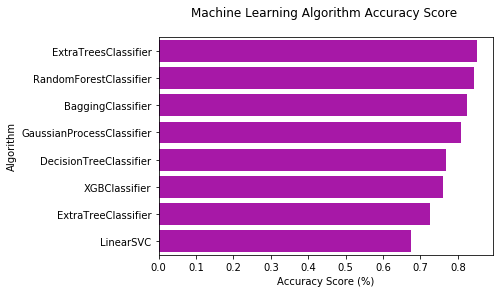

In [116]:
#Plot the MLA comparison table
sns.barplot(x='Test Accuracy Mean', y = 'Name', 
            data = df.sort_values('Test Accuracy Mean', ascending = False), color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

- `ExtraTreeClassifier`
- `RandomForestClassifier`
- `BaggingClassifier`
- `GaussianProcessClassifier`

### Search for parameters

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

In [98]:
# ExtraTreeClassifier
et_clf = ensemble.ExtraTreesClassifier(criterion='entropy', n_estimators = 400)
parameters = {
    'warm_start':[True, False],
    'ccp_alpha':[0.001, 0.01, 0.1]
}
et_clf_cv = GridSearchCV(estimator=et_clf, param_grid=parameters, scoring='accuracy', n_jobs = -1, cv = 4)

In [99]:
et_clf_cv.fit(X_improve, y)

GridSearchCV(cv=4,
             estimator=ExtraTreesClassifier(criterion='entropy',
                                            n_estimators=400),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [100]:
et_clf_cv.best_params_

{'ccp_alpha': 0.001, 'warm_start': False}

## Train Model

In [101]:
from sklearn import ensemble
train = pd.read_csv("train.csv")
X = train.drop(['Id', 'Cover_Type'], axis = 1)
X = prepare_data(X)
y = train['Cover_Type']

#initialize model
ext_clf = ensemble.ExtraTreesClassifier(criterion = 'entropy', n_estimators=400)

#Train the model
ext_clf.fit(X, y)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [102]:
# for clf in (ext_clf):
#     clf.fit(X_train_improve, y_train)
#     y_pred = clf.predict(X_test_improve)
#     print(clf.__class__.__name__, accuracy_score(y_pred, y_test))

In [103]:
# Check feature importance 
df = pd.DataFrame(columns = ['Name', 'Feature_importance'])
for i in range(len(X.columns)):
    feature_importance = ext_clf.feature_importances_[i]
    name = X.columns[i]
    df.loc[i, :] = [name, feature_importance]

In [104]:
# Show the ten most important features
df.sort_values('Feature_importance', ascending = False).head(10)

Name Feature_importance
0                         Elevation           0.105176
58                 Ele_minus_VDtHyd           0.101931
59                  Ele_plus_VDtHyd          0.0764121
13                 Wilderness_Area4          0.0714289
64                   Fire_plus_Road          0.0303936
62                  Hydro_plus_Road          0.0291501
5   Horizontal_Distance_To_Roadways          0.0284347
52                   soil_type38,39          0.0279889
63                 Hydro_minus_Road          0.0270305
12                 Wilderness_Area3          0.0255586

<AxesSubplot:xlabel='Feature_importance', ylabel='Name'>

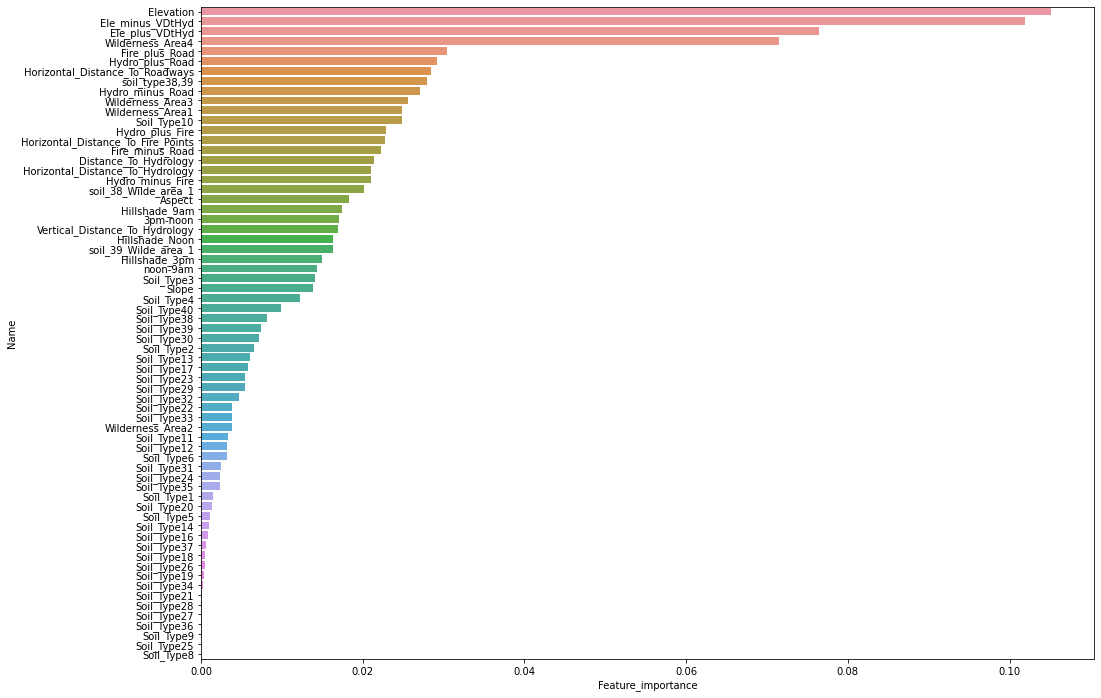

In [105]:
# Plot all features according to importance
plt.figure(figsize=(16,12))
sns.barplot(x = 'Feature_importance', y = 'Name', data = df.sort_values('Feature_importance', ascending = False))

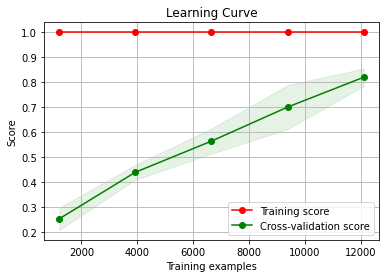

In [107]:
# Plot learning curve
from learning_curve import plot_learning_curve
plot_learning_curve(ext_clf, 'Learning Curve', X, y, cv=4)

# Result

In [108]:
#prepare data
test_ = pd.read_csv('test.csv')
test = test_.drop('Id', axis = 1)
test_prepare = prepare_data(test)

#Make prediction and save results
predictions = ext_clf.predict(test_prepare)
result = pd.DataFrame({'Id': test_['Id'], 'Cover_Type': predictions})
result

Id  Cover_Type
0        15121           1
1        15122           1
2        15123           1
3        15124           1
4        15125           1
...        ...         ...
565887  581008           3
565888  581009           3
565889  581010           3
565890  581011           3
565891  581012           3

[565892 rows x 2 columns]

In [109]:
result.to_csv('result.csv',index = False)
# Score: 0.80675